In [1]:
from PIL import Image
import numpy as np
import random

## Loading backgrounds ##

In [2]:
back1 = Image.open("./data_gen/background1.jpg")
back2 = Image.open("./data_gen/background2.jpg")
back3 = Image.open("./data_gen/background3.jpg")

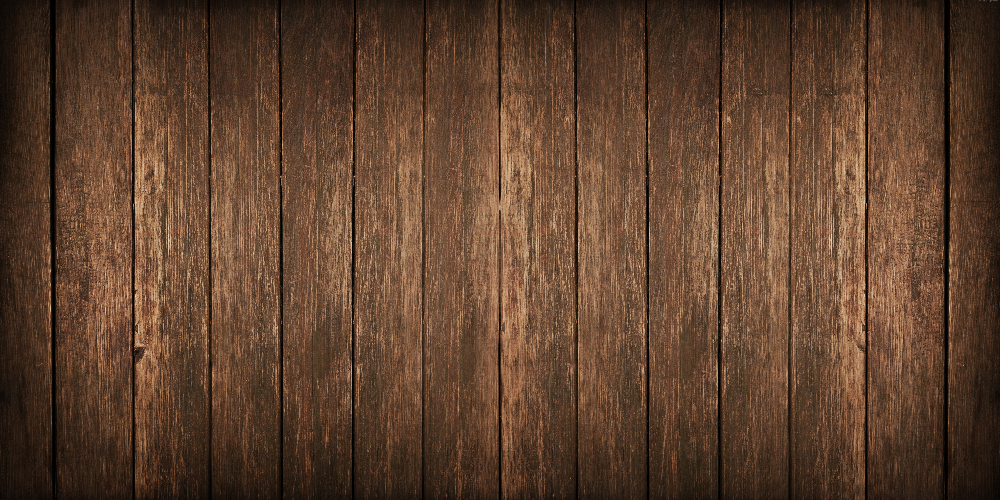

In [3]:
back1.resize((1000,500))

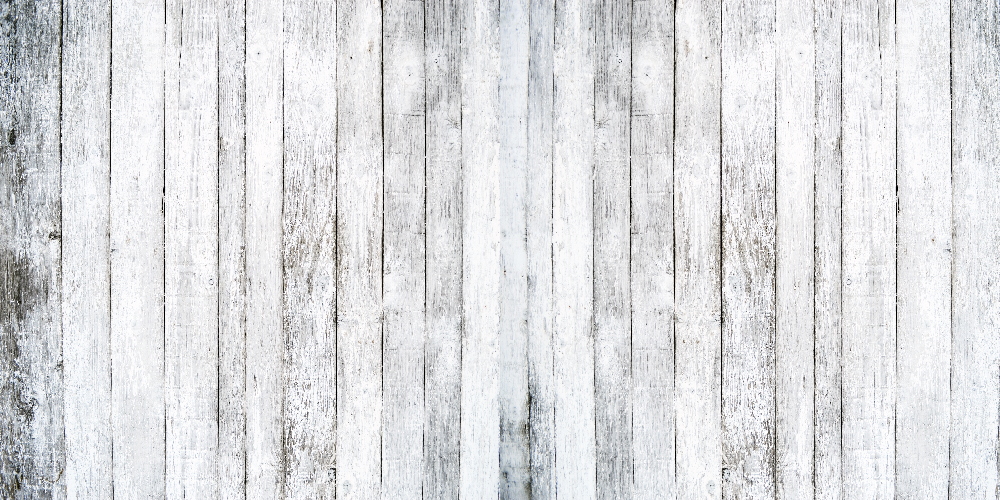

In [4]:
back2.resize((1000,500))

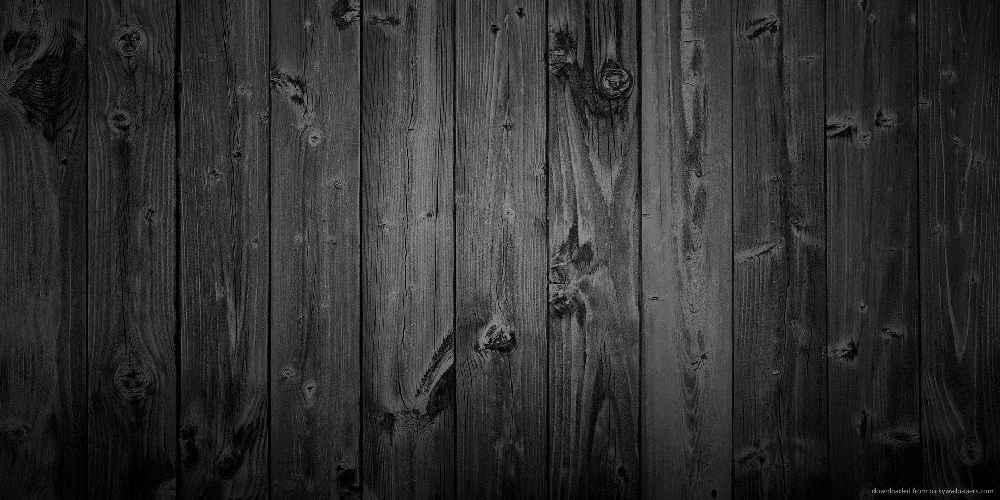

In [5]:
back3.resize((1000,500))

## Loading bees ##

In [6]:
bee1 = Image.open("./data_gen/bee1.png")
bee2 = Image.open("./data_gen/bee2.png")
bee3 = Image.open("./data_gen/bee3.png")

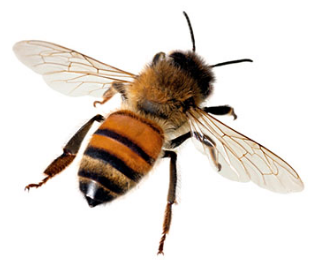

In [7]:
bee1

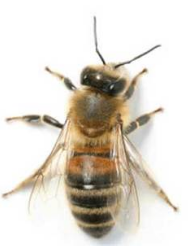

In [8]:
bee2

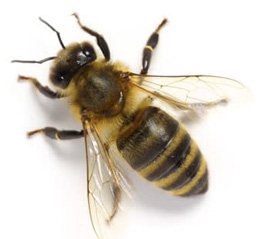

In [9]:
bee3

In [10]:
#im.rotate(45).show()

Achtung!:
- we have to resize both bees and backgrounds to get readable result,
- we can use rotating functions,
- we have to handle white background of bees images

In [10]:
print(bee1.size)
print(bee2.size)
print(bee3.size)

(319, 263)
(190, 246)
(260, 239)


In [11]:
# 4 times smaller
bee1r = bee1.resize((int(bee1.size[0] / 4), int(bee1.size[1] / 4)))
bee2r = bee2.resize((int(bee2.size[0] / 4), int(bee2.size[1] / 4)))
bee3r = bee3.resize((int(bee3.size[0] / 4), int(bee3.size[1] / 4)))

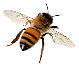

In [12]:
bee1r

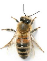

In [13]:
bee2r

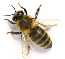

In [14]:
bee3r

## Time to generate some images! ##

In [50]:
def generate_image(background, bees, num_of_bees):
    '''
        background - PIL image
        bees - list of PIL images
    '''
    new_image = np.array(background)
    contour_image = np.array(background)
    
    for i in range(contour_image.shape[0]):
        for j in range(contour_image.shape[1]):
            for k in range(contour_image.shape[2]):
                contour_image[i, j, k] = 255
    
    for _ in range(int(num_of_bees / len(bees))):
        for bee in bees:
            coord_x = random.randint(0, background.size[1] - bee.size[1])
            coord_y = random.randint(0, background.size[0] - bee.size[0])
            
            # pasting bee at (coord_x, coord_y)
            bee_arr = np.array(bee)
            for i in range(3):
                for x in range(bee.size[1]):
                    for y in range(bee.size[0]):
                        if bee_arr[x, y, i] < 230: # we don't change background value when it's almost white
                            new_image[x + coord_x, y + coord_y, i] = bee_arr[x, y, i]
                            contour_image[x + coord_x, y + coord_y, i] = 0

    return new_image, contour_image

In [41]:
# we consider RGB images

In [25]:
bees = [bee1r, bee2r, bee3r]

In [21]:
back3.size

(1920, 1080)

In [23]:
background = back2.resize((1024,512))

In [44]:
img, contours = generate_image(background, bees, 50)

(512, 1024, 3)


In [45]:
img.shape

(512, 1024, 3)

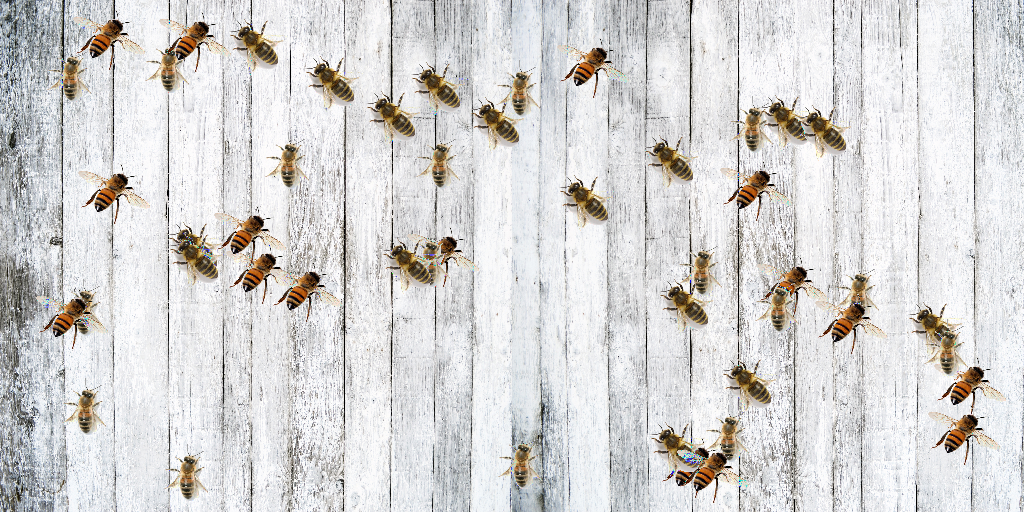

In [46]:
Image.fromarray(img)

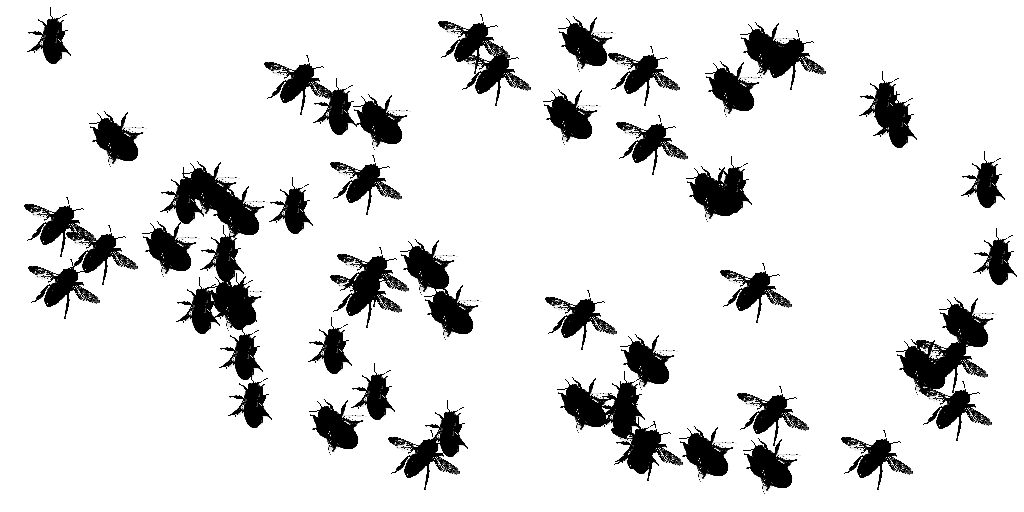

In [42]:
Image.fromarray(contours).convert('L')

In [ ]:
# generate samples

In [43]:
SAVE_DIR = './samples/'

In [53]:
def generate_samples():
    for i in range(40):
        img, contours = generate_image(background, bees, 50)
        name = SAVE_DIR + 'sample_' + str(i).zfill(2) + '.png'
        Image.fromarray(img).save(name)
        cname = SAVE_DIR + 'contour_sample_' + str(i).zfill(2) + '.png'
        Image.fromarray(contours).convert('L').save(cname)

In [55]:
# TODO - generating "moving" bees